<a href="https://colab.research.google.com/github/maya-papadopoulos/eda_assignment/blob/main/assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/ds3001f25/eda_assignment.git`
### Do Q1, Q2, and Q3.

**Q1.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
3. Show that $\text{cov}(a+bX,a+bX) = b^2 \text{cov}(X,X) $, and in particular that $\text{cov}(X,X) = s^2 $.
4. Instead of the mean, consider the median. Consider transformations that are non-decreasing (if $x\ge x'$, then $g(x)\ge g(x')$), like $2+5 \times X$ or $\text{arcsinh}(X)$. Is a non-decreasing transformation of the median the median of the transformed variable? Explain. Does your answer apply to any quantile? The IQR? The range?
5. Consider a non-decreasing transformation $g()$. Is is always true that $m(g(X))= g(m(X))$?

**Q2.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. This provides a dataset of AirBnB rental properties for New York City.  
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?

In [79]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Q2.1
airbnb_df = pd.read_csv('/airbnb_hw.csv')

### Question 2.2

In [62]:
#Q2.2
print(airbnb_df.shape, '\n') # List the dimensions of the data frame
print(airbnb_df.dtypes, '\n') # The types of the variables
print(airbnb_df.columns, '\n') # Column names
airbnb_df.head()

(30478, 13) 

Host Id                         int64
Host Since                     object
Name                           object
Neighbourhood                  object
Property Type                  object
Review Scores Rating (bin)    float64
Room Type                      object
Zipcode                       float64
Beds                          float64
Number of Records               int64
Number Of Reviews               int64
Price                          object
Review Scores Rating          float64
dtype: object 

Index(['Host Id', 'Host Since', 'Name', 'Neighbourhood ', 'Property Type',
       'Review Scores Rating (bin)', 'Room Type', 'Zipcode', 'Beds',
       'Number of Records', 'Number Of Reviews', 'Price',
       'Review Scores Rating'],
      dtype='object') 



,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


The dimensions of the data are 30478 x 13. This means there are 30478 observations. Variables include: Host Id, Host Since, Name, Neighbourhood, Property Type, Review Scores Rating, Room Type, Zipcode, Beds, Number of Records, Number Of Reviews, Price,and Review Scores Rating.

 ### Question 2.3

In [63]:
### Q2.3
pd.crosstab(airbnb_df['Room Type'], airbnb_df['Property Type'])

Property Type,Apartment,Bed & Breakfast,Boat,Bungalow,Cabin,Camper/RV,Castle,Chalet,Condominium,Dorm,House,Hut,Lighthouse,Loft,Other,Tent,Townhouse,Treehouse,Villa
Room Type,,,,,,,,,,,,,,,,,,,
Entire home/apt,15669,13,7,4,1,6,0,0,72,4,752,0,1,392,14,0,83,0,4
Private room,10748,155,1,0,1,1,1,1,22,16,1258,2,0,312,29,4,52,1,4
Shared room,685,12,0,0,0,0,0,0,0,11,80,0,0,49,4,0,1,3,0


 Apartments appear to be the most common property type. Other common property types would be house, lofts, and bed and breakfasts. Shared rooms look like the least popular room type. Private rooms are more common in Bed & Breakfasts, Dorms, Houses, and other.

### Question 2.4

<Axes: >

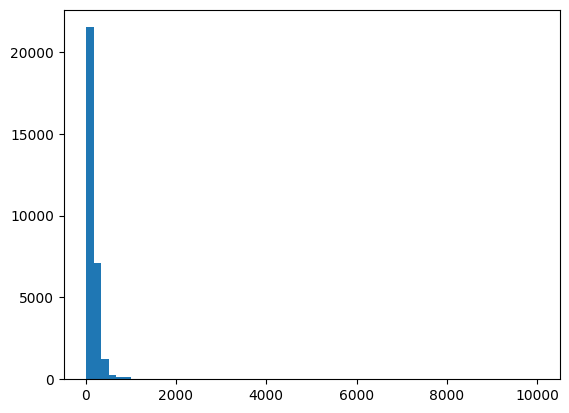

In [64]:

# clean 'Price' variable
airbnb_price = airbnb_df['Price']
#get rid of commas
airbnb_price = airbnb_price.str.replace(',', '')

#coerce variable to numeric
airbnb_price = pd.to_numeric(airbnb_price, errors = 'coerce')

# plots
airbnb_price.hist(bins=60,grid=False)

<Axes: ylabel='Density'>

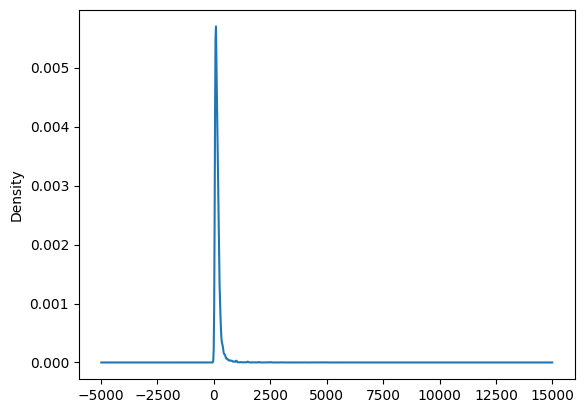

In [65]:
airbnb_price.plot.density() # The kernel density plot

<Axes: >

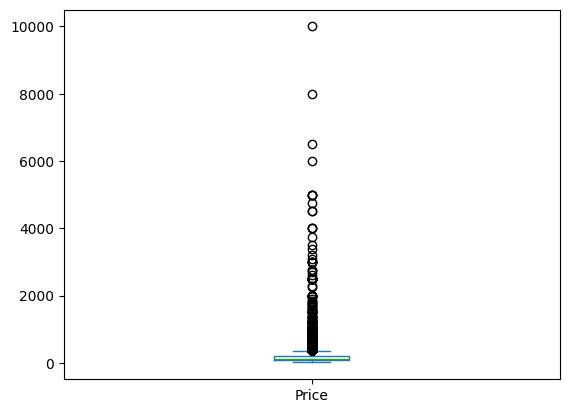

In [66]:
airbnb_price.plot.box() # box plot

Due to the large number of observations, the plots are difficult to read. It's hard to tell if there are many outliers due to the scaling of the data. In the boxplot, there does appear to be a few outliers.

<Axes: >

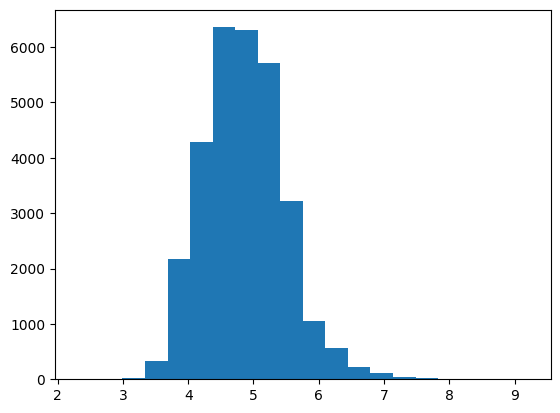

In [67]:
# log transformation
price_log = np.log(airbnb_price)

# Histogram of log prices > 0
price_log[price_log > 0].hist(bins=20, grid=False)


<Axes: ylabel='Density'>

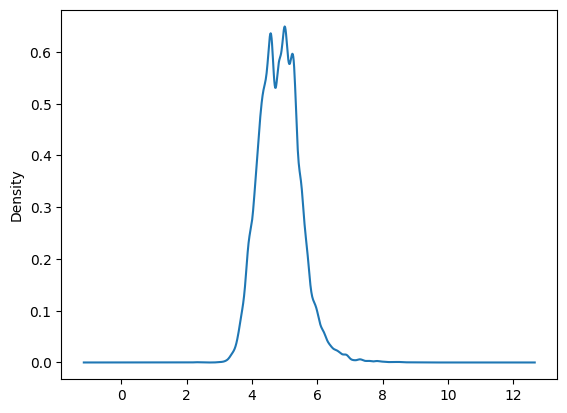

In [68]:
price_log.plot.density() # kernel density plot

<Axes: >

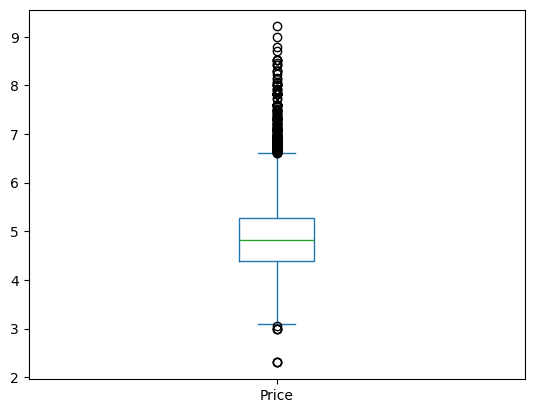

In [69]:
price_log.plot.box() # box plot

### Question 2.5

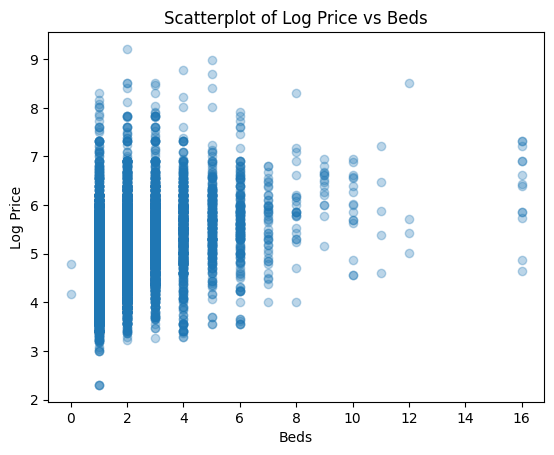

In [70]:
#Q2.5
plt.scatter(airbnb_df['Beds'], price_log, alpha=0.3)
plt.xlabel("Beds")
plt.ylabel("Log Price")
plt.title("Scatterplot of Log Price vs Beds")
plt.show()

A majority of listings have six or less beds. The log price decreases in range as the number of beds increase. There is a lot of price variation beyond 6 beds.

In [71]:
#make sure price is numeric
airbnb_df['Price'] = pd.to_numeric(
    airbnb_df['Price'].astype(str).str.replace(',', ''), errors='coerce'
)
# group by number of beds
airbnb_df.loc[:,['Beds', 'Price']].groupby('Beds').describe()

Price                                                           \
        count         mean          std    min     25%    50%      75%   
Beds                                                                     
0.0       2.0    92.000000    38.183766   65.0   78.50   92.0   105.50   
1.0   20344.0   127.673810   107.047827   10.0   75.00  100.0   155.00   
2.0    6610.0   199.061271   225.706318   25.0  115.00  160.0   225.00   
3.0    2071.0   268.118300   303.106942   26.0  140.00  200.0   300.00   
4.0     783.0   315.332056   353.184402   27.0  150.00  247.0   375.00   
5.0     284.0   411.500000   672.610659   35.0  189.75  290.0   450.00   
6.0     177.0   401.768362   417.018431   35.0  199.00  275.0   425.00   
7.0      45.0   341.377778   220.116631   55.0  177.00  300.0   445.00   
8.0      24.0   589.041667   793.054934   55.0  243.75  350.0   481.25   
9.0      15.0   618.000000   233.649616  175.0  447.50  650.0   762.50   
10.0     16.0   480.187500   296.820534   95.0  291.00  407.5   706.25   
11.0      5.0   535.800000   499.217588  100.0  220.00  359.0   650.00   
12.0      4.0  1418.750000  2388.285211  150.0  206.25  262.5  1475.00   
16.0     13.0   736.000000   496.804287  104.0  350.00  625.0  1000.00   

               
          max  
Beds           
0.0     119.0  
1.0    4000.0  
2.0   10000.0  
3.0    5000.0  
4.0    6500.0  
5.0    8000.0  
6.0    2750.0  
7.0     900.0  
8.0    4000.0  
9.0    1050.0  
10.0   1050.0  
11.0   1350.0  
12.0   5000.0  
16.0   1500.0

The mean price generally increases as the number of beds increases. Listings with 12 beds have the highest average price. The standard deviations are more varied, with less of an overall pattern. Listings with 12 beds have the largest standard deviation. Other listings with larger standard deviations also include listings with five beds or eight beds.

### Question 2.6

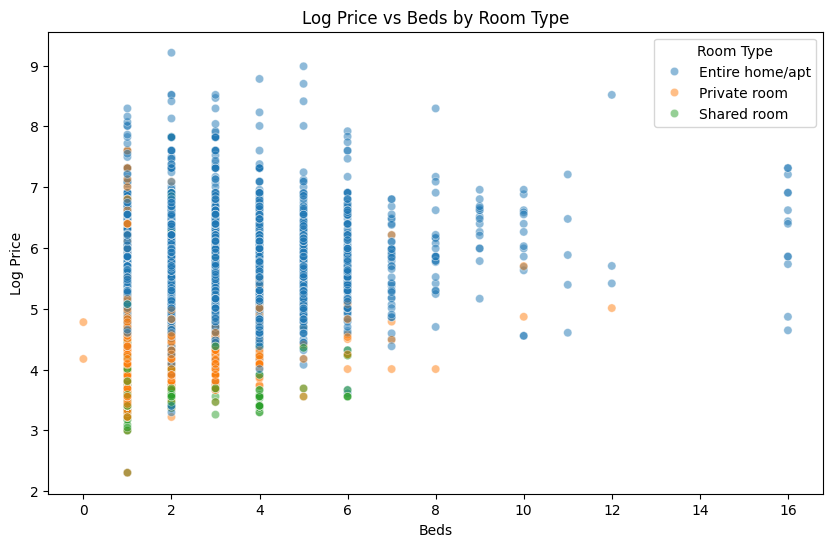

In [72]:
import seaborn as sns

airbnb_df['price_log'] = np.log(airbnb_df['Price'])

# Scatterplot by Room Type
plt.figure(figsize=(10,6))
sns.scatterplot(data=airbnb_df, x='Beds', y='price_log', hue='Room Type', alpha=0.5)
plt.title('Log Price vs Beds by Room Type')
plt.xlabel('Beds')
plt.ylabel('Log Price')
plt.legend(title='Room Type')
plt.show()


Entire home/apt is the most common listing based on the plot. Private rooms and shared rooms have lower prices than listings for entire homes/apts, which have the highest prices on average.

In [73]:
# ensure price is numeric
airbnb_df['Price'] = pd.to_numeric(
    airbnb_df['Price'].astype(str).str.replace(',', ''), errors='coerce'
)
airbnb_df.loc[:, ['Room Type', 'Property Type', 'Price']]\
    .groupby(['Room Type', 'Property Type'])\
    .describe()



Price                                  \
                                   count        mean          std    min   
Room Type       Property Type                                              
Entire home/apt Apartment        15669.0  213.224839   218.097834   10.0   
                Bed & Breakfast     13.0  184.538462   119.814172   85.0   
                Boat                 7.0  158.428571    51.110524  100.0   
                Bungalow             4.0  150.750000    46.464144   87.0   
                Cabin                1.0  250.000000          NaN  250.0   
                Camper/RV            6.0  114.333333   107.685963   45.0   
                Condominium         72.0  304.861111   266.197497   80.0   
                Dorm                 4.0   44.250000    24.060687   30.0   
                House              752.0  297.263298   468.409428   27.0   
                Lighthouse           1.0   39.000000          NaN   39.0   
                Loft               392.0  330.510204   321.519721   55.0   
                Other               14.0  843.428571  1133.062271   66.0   
                Townhouse           83.0  280.783133   314.605252   66.0   
                Villa                4.0  529.750000   650.963581  120.0   
Private room    Apartment        10748.0   92.713900    65.237050   10.0   
                Bed & Breakfast    155.0   97.161290    47.031971   32.0   
                Boat                 1.0  120.000000          NaN  120.0   
                Cabin                1.0   80.000000          NaN   80.0   
                Camper/RV            1.0   39.000000          NaN   39.0   
                Castle               1.0  150.000000          NaN  150.0   
                Chalet               1.0   99.000000          NaN   99.0   
                Condominium         22.0   98.590909    40.576394   46.0   
                Dorm                16.0   86.562500    40.738137   50.0   
                House             1258.0   77.750397    49.402650   25.0   
                Hut                  2.0   75.000000    35.355339   50.0   
                Loft               312.0  108.057692   128.817912   39.0   
                Other               29.0  211.931034   235.404505   39.0   
                Tent                 4.0  126.250000    94.989034   40.0   
                Townhouse           52.0   83.365385    30.578109   45.0   
                Treehouse            1.0   95.000000          NaN   95.0   
                Villa                4.0  126.250000    71.107313   60.0   
Shared room     Apartment          685.0   79.200000    67.720849   20.0   
                Bed & Breakfast     12.0  143.666667   245.328104   30.0   
                Dorm                11.0   73.181818    46.328864   30.0   
                House               80.0   77.487500   275.409936   10.0   
                Loft                49.0   78.816327    87.521824   30.0   
                Other                4.0  148.750000   134.806961   70.0   
                Townhouse            1.0   95.000000          NaN   95.0   
                Treehouse            3.0  167.666667   114.788211   95.0   

                                                                  
                                    25%    50%      75%      max  
Room Type       Property Type                                     
Entire home/apt Apartment        135.00  175.0   235.00  10000.0  
                Bed & Breakfast  121.00  130.0   220.00    525.0  
                Boat             122.50  150.0   182.00    250.0  
                Bungalow         133.50  160.5   177.75    195.0  
                Cabin            250.00  250.0   250.00    250.0  
                Camper/RV         49.00   74.0   114.00    325.0  
                Condominium      155.00  200.0   375.00   1990.0  
                Dorm              30.00   33.5    47.75     80.0  
                House            126.50  195.0   300.00   8000.0  
                Lighthouse        39.0

The room type and property type with the highest price on average would be houses in the entire house/apt category. The room and property type with the highest standard deviation would be 'other' in the entire house/apt category. Median appears to be a more reliable estimate because it is less affected by outliers. So when there are especially expensive listings, they do not have as strong of an effect on an estimate of central tendency.

## Question 3

**Q3.** This question looks at a time series of the number of active oil drilling rigs in the United States over time. The data comes from the Energy Information Agency.

1. Load `./data/drilling_rigs.csv` and examine the data. How many observations? How many variables? Are numeric variables correctly read in by Pandas, or will some variables have to be typecast/coerced? Explain clearly how these data need to be cleaned.
2. To convert the `Month` variable to an ordered datetime variable, use `df['time'] = pd.to_datetime(df['Month'], format='mixed')`.
3. Let's look at `Active Well Service Rig Count (Number of Rigs)`, which is the total number of rigs over time. Make a line plot of this time series. Describe what you see.
4. Instead of levels, we want to look at change over time. Compute the first difference of  `Active Well Service Rig Count (Number of Rigs)` and plot it over time. Describe what you see.
5. The first two columns are the number of onshore and offshore rigs, respectively. Melt these columns and plot the resulting series.

### Question 3.1

In [81]:
df_rigs = pd.read_csv('/drilling_rigs.csv')
print(df_rigs.shape, '\n') # List the dimensions of the data frame
print(df_rigs.dtypes, '\n') # The types of the variables
print(df_rigs.columns, '\n') # Column names
df_rigs.head()

(623, 10) 

Month                                                                                          object
Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)                    int64
Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)                   int64
Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)                                     object
Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)                                   object
Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)     object
Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)    object
Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)       object
Crude Oil and Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)                      int64
Active Well Service Rig Count (Number of Rigs)                        

,Month,"Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)","Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)","Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)",Active Well Service Rig Count (Number of Rigs)
0,1973 January,1120,99,Not Available,Not Available,Not Available,Not Available,Not Available,1219,1549
1,1973 February,1037,89,Not Available,Not Available,Not Available,Not Available,Not Available,1126,1677
2,1973 March,959,90,Not Available,Not Available,Not Available,Not Available,Not Available,1049,1805
3,1973 April,914,79,Not Available,Not Available,Not Available,Not Available,Not Available,993,1898
4,1973 May,974,72,Not Available,Not Available,Not Available,Not Available,Not Available,1046,1991


There are 623 observations and 14 variables. There were variables read in as objects that should be numeric like: Total Crude Oil Rigs,Total Natural Gas Rigs, Horizontal / Directional / Vertical Trajectory Rigs, and Active Well Service Rig Count. To clean them I need to remove commas or other formatting characters. Then, I need to coerce the variables to numeric.

### Question 3.2

In [84]:
# convert month column to datetime
df_rigs['time'] = pd.to_datetime(df_rigs['Month'], format='mixed')

# check
print(df_rigs[['Month','time']].head())


           Month       time
0   1973 January 1973-01-01
1  1973 February 1973-02-01
2     1973 March 1973-03-01
3     1973 April 1973-04-01
4       1973 May 1973-05-01


### Question 3.3

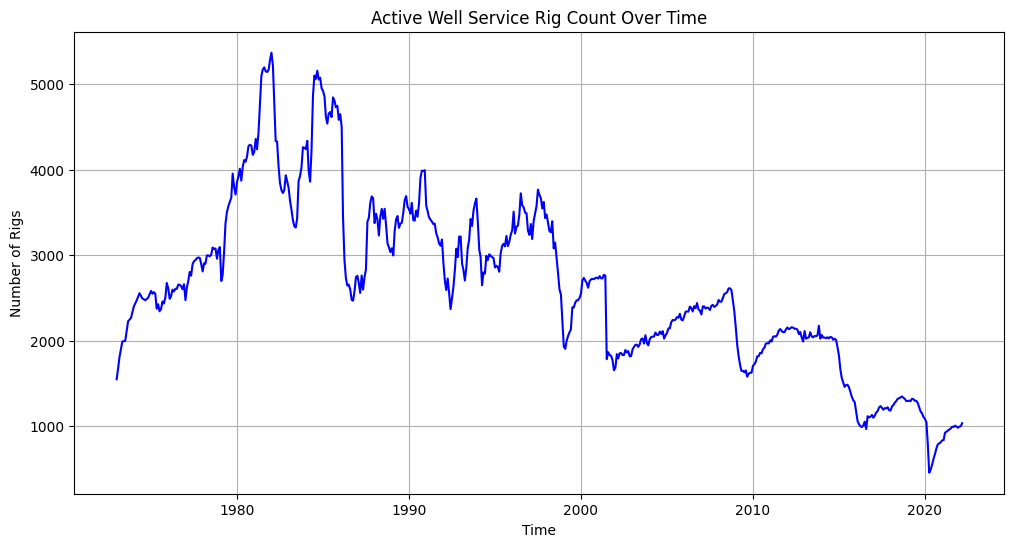

In [86]:
# make sure active well rig count is numeric
df_rigs['Active Well Service Rig Count (Number of Rigs)'] = pd.to_numeric(
    df_rigs['Active Well Service Rig Count (Number of Rigs)'].astype(str).str.replace(',', ''),
    errors='coerce'
)

# line plot
plt.figure(figsize=(12,6))
plt.plot(df_rigs['time'], df_rigs['Active Well Service Rig Count (Number of Rigs)'], color='blue')
plt.title('Active Well Service Rig Count Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Rigs')
plt.grid(True)
plt.show()


There are many peaks in valleys in the line plot. However, from 1982 to 2020, there is an overall decrease in number of rigs.

### Question 3.4

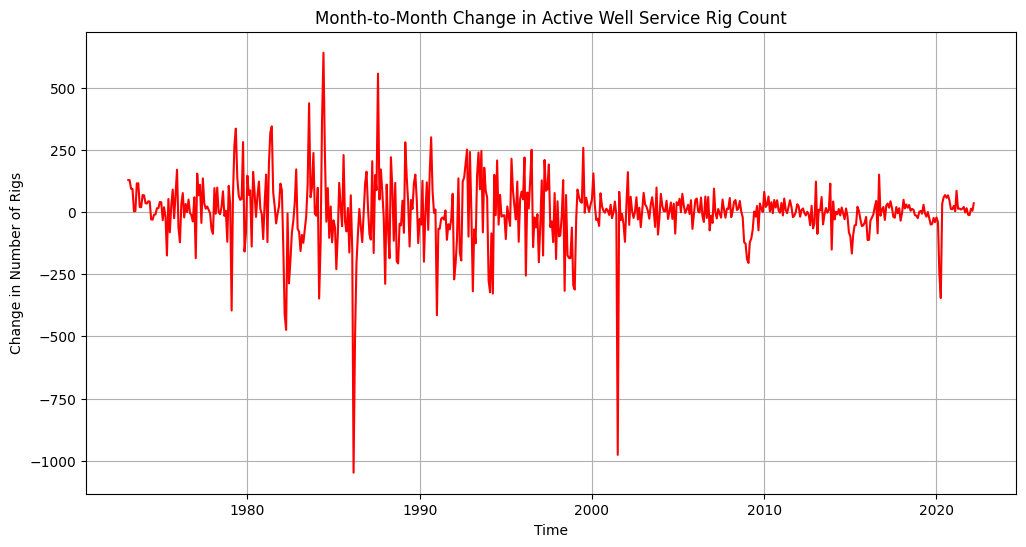

In [87]:
# compute first difference
df_rigs['Rig_Change'] = df_rigs['Active Well Service Rig Count (Number of Rigs)'].diff()

# plot the first difference
plt.figure(figsize=(12,6))
plt.plot(df_rigs['time'], df_rigs['Rig_Change'], color='red')
plt.title('Month-to-Month Change in Active Well Service Rig Count')
plt.xlabel('Time')
plt.ylabel('Change in Number of Rigs')
plt.grid(True)
plt.show()


There are extreme dips in the change in number of rigs in the years 1986 and 2001. There were larger spikes in 1984 and 1987/8.

### Question 3.5

In [89]:
# melt onshore and offshore rig columns
df_melted = df_rigs.melt(
    id_vars='time',
    value_vars=[
        'Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)',
        'Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)'
    ],
    var_name='Rig_Type',
    value_name='Count'
)

df_melted.head()


,time,Rig_Type,Count
0,1973-01-01,Crude Oil and Natural Gas Rotary Rigs in Opera...,1120
1,1973-02-01,Crude Oil and Natural Gas Rotary Rigs in Opera...,1037
2,1973-03-01,Crude Oil and Natural Gas Rotary Rigs in Opera...,959
3,1973-04-01,Crude Oil and Natural Gas Rotary Rigs in Opera...,914
4,1973-05-01,Crude Oil and Natural Gas Rotary Rigs in Opera...,974


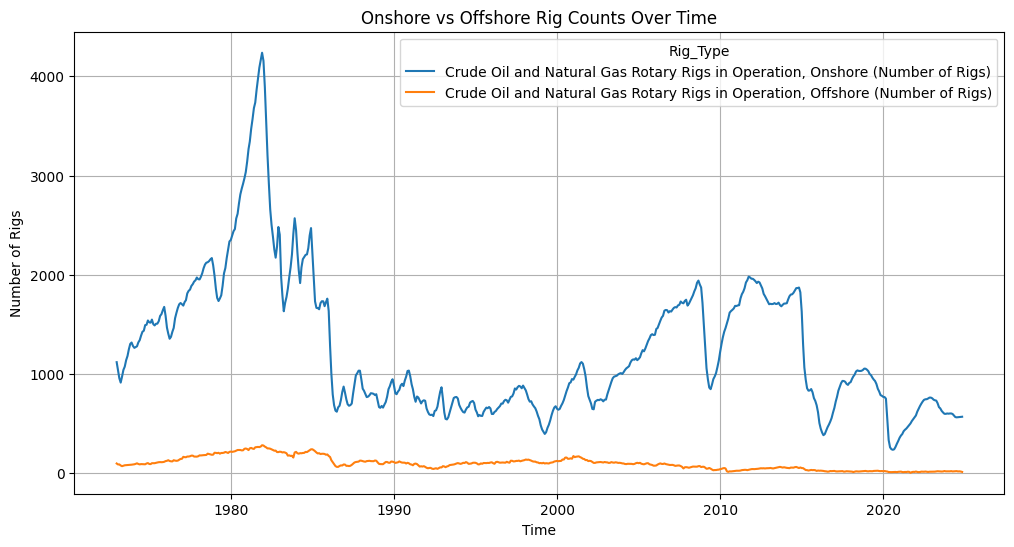

In [90]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df_melted, x='time', y='Count', hue='Rig_Type')
plt.title('Onshore vs Offshore Rig Counts Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Rigs')
plt.grid(True)
plt.show()
